In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nbody import Particles, NbodySimulation

In [2]:
time          = 0    # the starting  time
num_particles = 100 # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)
# Ek            = np.zeros((1,1))
# U             = np.zeros((1,1))

particles = Particles(N=num_particles)

In [3]:
particles.set_masses(masses=masses)
particles.set_positions(positions=positions)
particles.set_velocities(velocities=velocities)
particles.set_accelerations(accelerations=accelerations)
particles.set_tags(tags=tags)
# 
#把數據傳到class

In [4]:
tags_check    = particles.get_tags()
masses        = particles.get_masses()
positions     = particles.get_positions()
velocities    = particles.get_velocities()
accelerations = particles.get_accelerations()
# Ek            = particles.get_Ek()
# U             = particles.get_U()
#check class getter
# print(tags_check==tags)
particles.output(fn="data_particles.txt",time=time)
t,m,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt("data_particles.txt")

In [5]:

def initial_NormalDistribution(N=100,total_mass = 20):
    particles = Particles (N=N)

    masses = particles.get_masses()
    mass = total_mass/particles.nparticles

    positions = particles.get_positions()
    np.random.seed(0)
    positions = np.random.randn(N,3)

    velocities = particles.get_velocities()
    np.random.seed(0)
    velocities = np.random.randn(N,3)
    
    accelerations = particles.get_accelerations()
    np.random.seed(0)
    accelerations = np.random.randn(N,3)

    particles.set_masses((masses*mass))
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    return particles

In [6]:
# particles_cloud = initial_NormalDistribution(N=100)
# positions = particles_cloud.get_positions() 
# fig = plt.figure(1)
# ax = fig.gca(projection='3d')
# ax.scatter(positions[:,0],positions[:,1],positions[:,2])

In [7]:
problem_name = "Nbody_simulation"
G      =  6.68e-8 # cgs

In [8]:
particles = Particles(N=100)
particles = initial_NormalDistribution(N=100,total_mass = 20)
sim = NbodySimulation(particles)
sim.setup(G=G,method="RK2",io_freq=10,io_title=problem_name,io_screen=False,visualized=False)
sim.evolve(dt=0.1,tmax=100)

In [9]:
import glob

In [10]:
fns = "data_"+problem_name+"/data_"+problem_name+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()
#print(fns) 

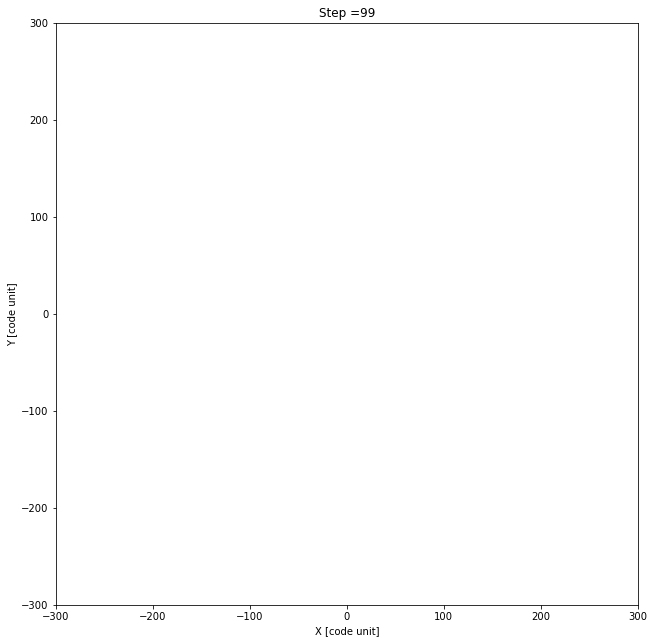

In [11]:
scale = 3 

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
line, = ax.plot([],[],'o')

def init():
    ax.set_xlim(-100*scale,100*scale)
    ax.set_ylim(-100*scale,100*scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    #print("loadtxt done",fn)
    line.set_data(x,y)
    plt.title("Step ="+str(frame))
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)

In [12]:
# masses        = particles.get_masses()
# positions     = particles.get_positions()
# velocities    = particles.get_velocities()
# accelerations = particles.get_accelerations()
# time          = particles.get_time()
particles = Particles(N=100)
sim = NbodySimulation(particles=particles)
sim.setup(G=6.67e-8, io_freq=1)
sim.evolve(dt = 0.01, tmax=10)
print(sim.Ek)
print(sim.T)
plt.figure(1)
plt.plot(sim.T,sim.Ek,'--',label="RK4",markersize=3)
plt.xlabel('omega')
plt.ylabel('u')
plt.show()
print("Done!")
    
# print(velocities[2,2])
# print(velocities[2,2]**2)
# print(np.sum(velocities[1,:]**2))
# print(time)
# plt.figure(1)
# plt.plot(time,Ek,'-o',label="RK4",markersize=3)
# plt.xlabel('t (sec)')
# plt.ylabel('Ek(J)')
# plt.legend()

# for i in range(N):
#     vel_vel=np.sum(velocities**2,axis=1)
# print(len(vel_vel))
# print(len(masses))

# Ek = np.zeros(N)
# for i in range(N):
#     Ek[i] = 0.5*masses[i]*vel_vel[i]
# print(np.sum(Ek))



# print(np.sum(Ek))
# for i in range(npts):
#             for j in range(npts):
#                 if(j>i):
#                     x = (posx[i] - posx[j])
#                     y = (posy[i] - posy[j])
#                     z = (posz[i] - posz[j])
#                     rsq = x**2 + y**2 + z**2
#                     req = np.sqrt(x**2+y**2)
#                     force = -G*mass[i,0]*mass[j,0]/(rsq+rsoft)
#                     theta = np.arctan2(y,x)
#                     phi = np.arctan2(z,req)
#                     fx = force*np.cos(theta)*np.cos(phi)
#                     fy = force*np.sin(theta)*np.cos(phi)
#                     fz = force*np.sin(phi)

#                     acc[i,0] += fx/mass[i,0]
#                     acc[i,1] += fy/mass[i,0]
#                     acc[i,2] += fz/mass[i,0]

#                     acc[j,0] -= fx/mass[j,0]
#                     acc[j,1] -= fy/mass[j,0]
#                     acc[j,2] -= fz/mass[j,0]

n = 0  time = 0.0  dt = 0.01
n = 1  time = 0.01  dt = 0.01
n = 2  time = 0.02  dt = 0.01
n = 3  time = 0.03  dt = 0.01
n = 4  time = 0.04  dt = 0.01
n = 5  time = 0.05  dt = 0.01
n = 6  time = 0.060000000000000005  dt = 0.01
n = 7  time = 0.07  dt = 0.01
n = 8  time = 0.08  dt = 0.01
n = 9  time = 0.09  dt = 0.01
n = 10  time = 0.09999999999999999  dt = 0.01
n = 11  time = 0.10999999999999999  dt = 0.01
n = 12  time = 0.11999999999999998  dt = 0.01
n = 13  time = 0.12999999999999998  dt = 0.01
n = 14  time = 0.13999999999999999  dt = 0.01
n = 15  time = 0.15  dt = 0.01
n = 16  time = 0.16  dt = 0.01
n = 17  time = 0.17  dt = 0.01
n = 18  time = 0.18000000000000002  dt = 0.01
n = 19  time = 0.19000000000000003  dt = 0.01
n = 20  time = 0.20000000000000004  dt = 0.01
n = 21  time = 0.21000000000000005  dt = 0.01
n = 22  time = 0.22000000000000006  dt = 0.01
n = 23  time = 0.23000000000000007  dt = 0.01
n = 24  time = 0.24000000000000007  dt = 0.01
n = 25  time = 0.25000000000000006  dt =

AttributeError: 'NbodySimulation' object has no attribute 'Ek'